In [87]:
import pandas as pd 
df= pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [88]:
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [89]:
# Feature and target selection
X = df['housing_median_age']
y = df['median_income']

In [90]:
# Check null values
print(X.isnull().sum())
print(y.isnull().sum())

0
0


In [91]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values.reshape(-1, 1))
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [92]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [93]:
from sklearn.linear_model import LinearRegression

# Linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [94]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9538407229513473


In [95]:
# Calculate custom cost
w = regr.coef_[0]
b = regr.intercept_
custom_cost = compute_cost(X_test.flatten(), y_test, w, b)
print(f"Custom Cost: {custom_cost}")

Custom Cost: [0.47692036]


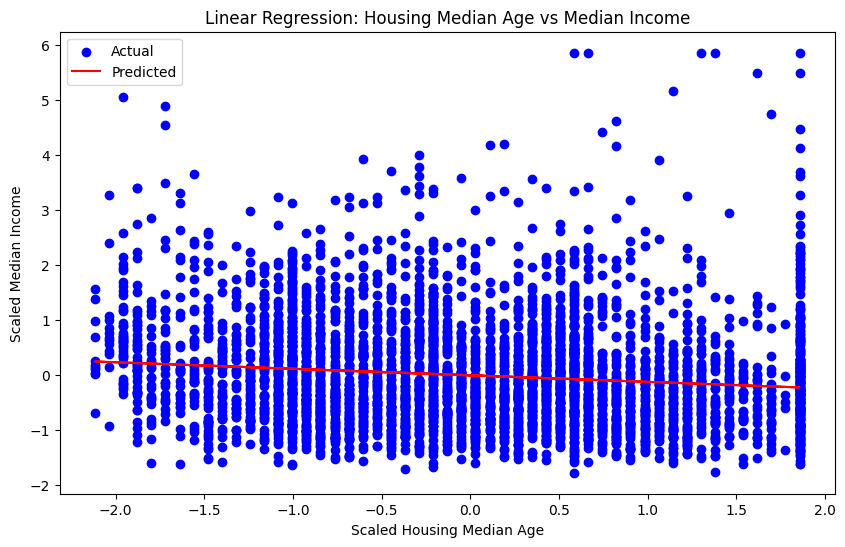

In [96]:
import matplotlib.pyplot as plt
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Scaled Housing Median Age')
plt.ylabel('Scaled Median Income')
plt.title('Linear Regression: Housing Median Age vs Median Income')
plt.legend()
plt.show()